# 1. EDA

In [110]:
import sys
sys.path.append("../src")   
import pandas as pd
import numpy as np
from config import DATA_PATH, TARGET_COL
from preprocessing import load_data

In [111]:
df = load_data()
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [112]:
df.shape

(5288, 15)

In [113]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5288 non-null   int64  
 1   gender                  5288 non-null   object 
 2   pulse_rate              5288 non-null   int64  
 3   systolic_bp             5288 non-null   int64  
 4   diastolic_bp            5288 non-null   int64  
 5   glucose                 5288 non-null   float64
 6   height                  5288 non-null   float64
 7   weight                  5288 non-null   float64
 8   bmi                     5288 non-null   float64
 9   family_diabetes         5288 non-null   int64  
 10  hypertensive            5288 non-null   int64  
 11  family_hypertension     5288 non-null   int64  
 12  cardiovascular_disease  5288 non-null   int64  
 13  stroke                  5288 non-null   int64  
 14  diabetic                5288 non-null   

,age,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,45.745651,76.626135,133.996596,82.229576,7.563922,1.548886,53.644100,22.466581,0.031959,0.111006,0.033661,0.011346,0.003782
std,13.422024,12.229319,22.231752,12.479007,2.944381,0.080328,10.076059,8.819898,0.175908,0.314169,0.180372,0.105924,0.061389
min,21.000000,5.000000,62.000000,45.000000,0.000000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,69.000000,119.000000,73.000000,6.000000,1.520000,46.775000,19.620000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.000000,130.000000,81.000000,6.930000,1.550000,53.000000,21.870000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,84.000000,147.000000,90.000000,8.130000,1.600000,59.900000,24.472500,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
df[TARGET_COL].value_counts() #imbalance check


diabetic
No     4946
Yes     342
Name: count, dtype: int64

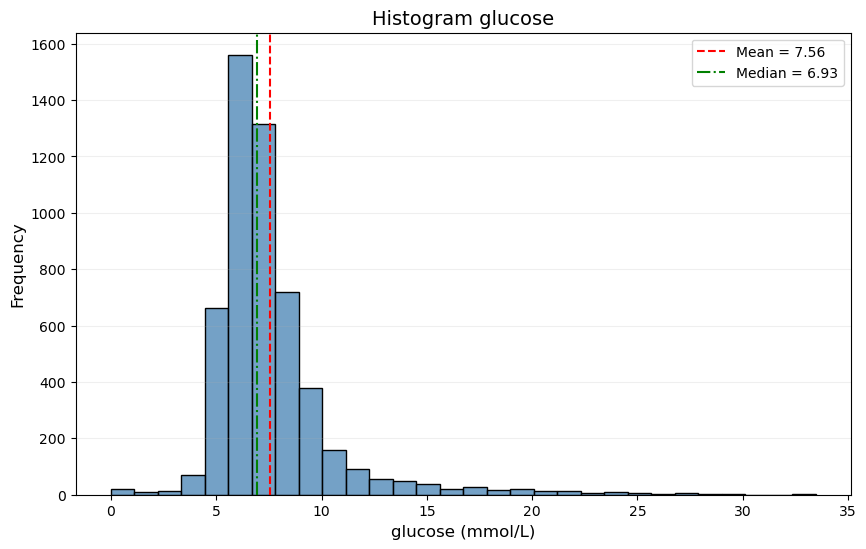

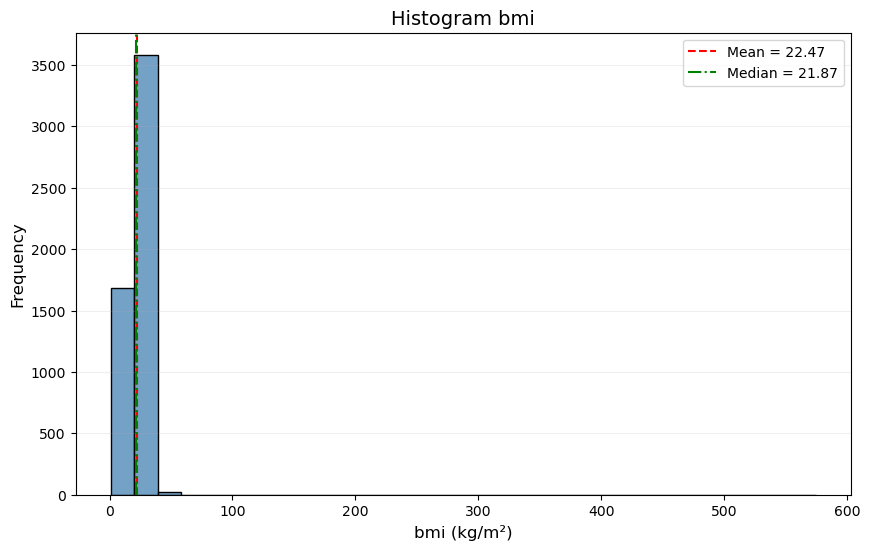

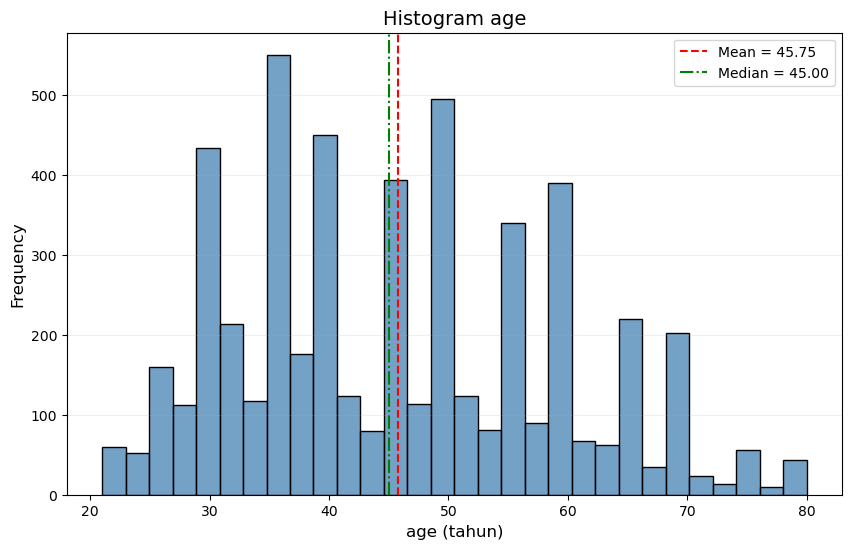

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histogram(df, column, unit=None, bins=30):
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    sns.histplot(df[column].dropna(), bins=bins, kde=False, color="steelblue")
    
    # Count mean and median
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    # Plot mean dan median lines
    plt.axvline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    plt.axvline(median_val, color="green", linestyle="-.", linewidth=1.5, label=f"Median = {median_val:.2f}")
    
    plt.title(f"Histogram {column}", fontsize=14)
    
    # X-Axis label
    if unit:
        plt.xlabel(f"{column} ({unit})", fontsize=12)
    else:
        plt.xlabel(column, fontsize=12)

    # Y-Axis label
    plt.ylabel("Frequency", fontsize=12)
    
    plt.legend()
    plt.grid(axis="y", alpha=0.2)
    plt.show()


# Pemanggilan fungsi untuk fitur penting
plot_histogram(df, "glucose", unit="mmol/L")
plot_histogram(df, "bmi", unit="kg/m²")
plot_histogram(df, "age", unit="tahun")


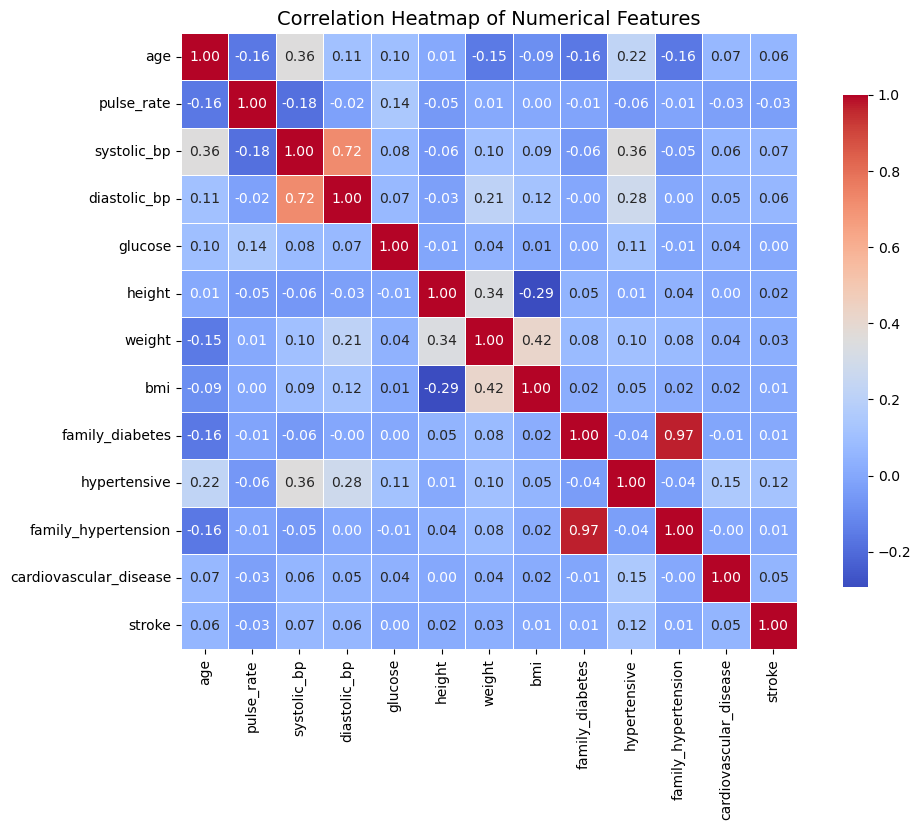

In [116]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Compute correlation
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


# 2. Preprocessing and Data Export



In [117]:
# import sys
# sys.path.append("../diabetes-ml/src")

# import numpy as np
import os

from preprocessing import load_data, preprocess_dataframe

# 1. Load raw data
df = load_data()

# 2. Run full preprocessing pipeline
(
    X_train,
    X_test,
    y_train,
    y_test,
    X_train_scaled,
    X_test_scaled,
    scaler,
    encoders
) = preprocess_dataframe(df)

# 3. Save processed arrays to data/processed
os.makedirs("../data/processed", exist_ok=True)

np.save("../data/processed/X_train_scaled.npy", X_train_scaled)
np.save("../data/processed/X_test_scaled.npy", X_test_scaled)
np.save("../data/processed/y_train.npy", y_train.to_numpy())
np.save("../data/processed/y_test.npy", y_test.to_numpy())


# 3. Baseline Modeling

In [118]:
import sys
sys.path.append("../src")  # make src importable from notebooks

import numpy as np
import pandas as pd

# Load processed data
X_train_scaled = np.load("../data/processed/X_train_scaled.npy")
X_test_scaled = np.load("../data/processed/X_test_scaled.npy")
y_train = np.load("../data/processed/y_train.npy", allow_pickle=True)
y_test = np.load("../data/processed/y_test.npy", allow_pickle=True)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((4230, 14), (1058, 14), (4230,), (1058,))

In [119]:
from evaluation import evaluate_model

results_baseline = []  # to store results for all models


In [120]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

res_lr = evaluate_model(
    log_reg,
    X_train_scaled,
    X_test_scaled,
    y_train_encoded,
    y_test_encoded,
    model_name="Logistic Regression"
)
results_baseline.append(res_lr)


Model: Logistic Regression
Accuracy: 0.9357
ROC AUC : 0.8274

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       990
           1       0.50      0.13      0.21        68

    accuracy                           0.94      1058
   macro avg       0.72      0.56      0.59      1058
weighted avg       0.91      0.94      0.92      1058

Confusion Matrix:
[[981   9]
 [ 59   9]]


In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

res_rf = evaluate_model(
    rf,
    X_train_scaled,
    X_test_scaled,
    y_train_encoded,
    y_test_encoded,
    model_name="Random Forest"
)
results_baseline.append(res_rf)


Model: Random Forest
Accuracy: 0.9357
ROC AUC : 0.8585

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       990
           1       0.50      0.12      0.19        68

    accuracy                           0.94      1058
   macro avg       0.72      0.55      0.58      1058
weighted avg       0.91      0.94      0.92      1058

Confusion Matrix:
[[982   8]
 [ 60   8]]


In [122]:
from sklearn.svm import SVC

svm_clf = SVC(
    kernel="rbf",
    probability=True,
    random_state=42
)

res_svm = evaluate_model(
    svm_clf,
    X_train_scaled,
    X_test_scaled,
    y_train_encoded,
    y_test_encoded,
    model_name="SVM (RBF)"
)
results_baseline.append(res_svm)


Model: SVM (RBF)
Accuracy: 0.9376
ROC AUC : 0.7079

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       990
           1       0.57      0.12      0.20        68

    accuracy                           0.94      1058
   macro avg       0.76      0.56      0.58      1058
weighted avg       0.92      0.94      0.92      1058

Confusion Matrix:
[[984   6]
 [ 60   8]]


In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5
)

res_knn = evaluate_model(
    knn,
    X_train_scaled,
    X_test_scaled,
    y_train_encoded,
    y_test_encoded,
    model_name="KNN (k=5)"
)
results_baseline.append(res_knn)


Model: KNN (k=5)
Accuracy: 0.9301
ROC AUC : 0.6907

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       990
           1       0.38      0.15      0.21        68

    accuracy                           0.93      1058
   macro avg       0.66      0.57      0.59      1058
weighted avg       0.91      0.93      0.92      1058

Confusion Matrix:
[[974  16]
 [ 58  10]]


In [124]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

res_xgb = evaluate_model(
    xgb_clf,
    X_train_scaled,
    X_test_scaled,
    y_train_encoded,
    y_test_encoded,
    model_name="XGBoost"
)
results_baseline.append(res_xgb)


Model: XGBoost
Accuracy: 0.9386
ROC AUC : 0.8612

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       990
           1       0.57      0.19      0.29        68

    accuracy                           0.94      1058
   macro avg       0.76      0.59      0.63      1058
weighted avg       0.92      0.94      0.92      1058

Confusion Matrix:
[[980  10]
 [ 55  13]]


In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay
)

import pandas as pd

In [126]:
results_df = pd.DataFrame(results_baseline)
results_df


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709
4,XGBoost,0.938563,0.565217,0.191176,0.285714,0.861215


In [127]:
results_df.sort_values(by="ROC-AUC", ascending=False)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
4,XGBoost,0.938563,0.565217,0.191176,0.285714,0.861215
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709


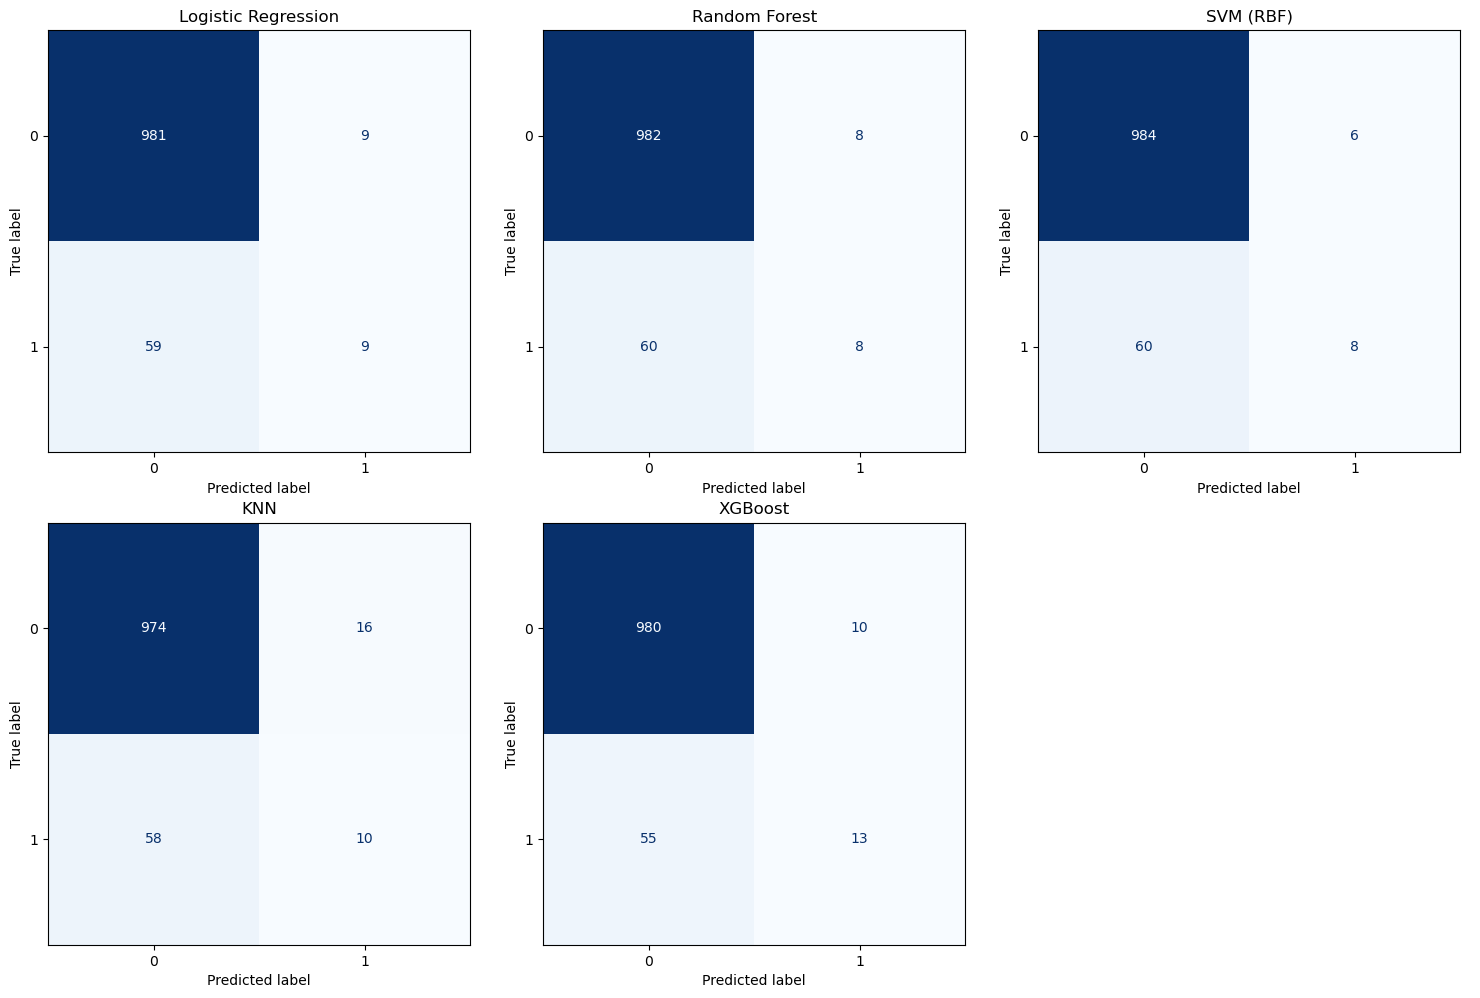

In [128]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "SVM (RBF)": svm_clf,
    "KNN": knn,
    "XGBoost": xgb_clf
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 baris x 3 kolom (1 slot kosong)
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test_encoded, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=[0, 1]  # 0 = No, 1 = Yes (bisa kamu jelasin di skripsi)
    )
    disp.plot(ax=axes[idx], cmap="Blues", colorbar=False)
    axes[idx].set_title(name)

# Matikan axis kosong kalau jumlah model < jumlah subplot
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

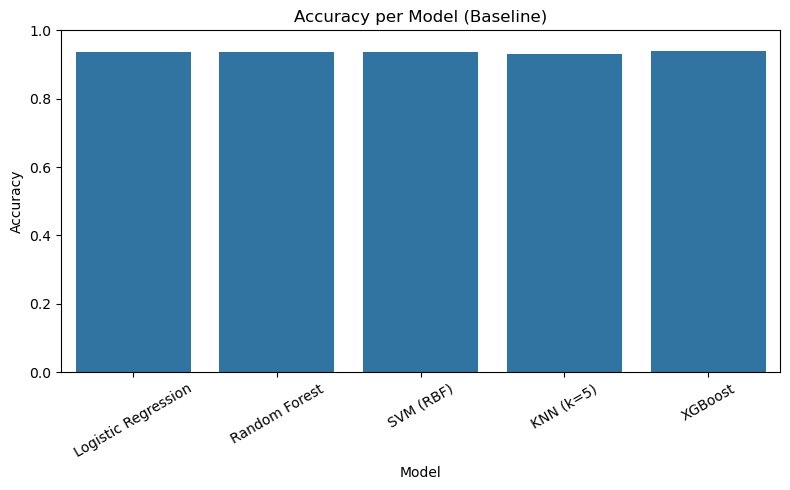

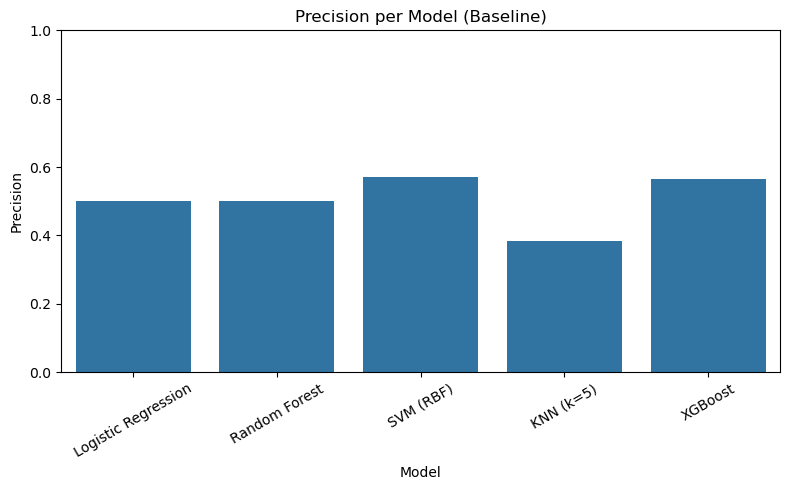

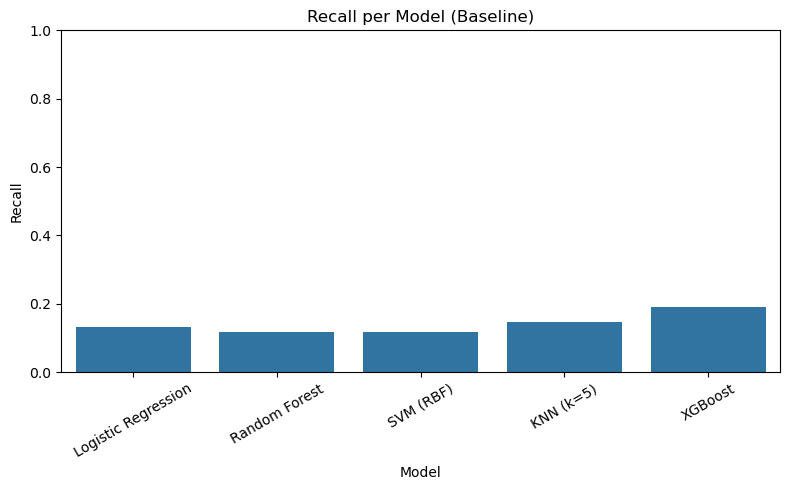

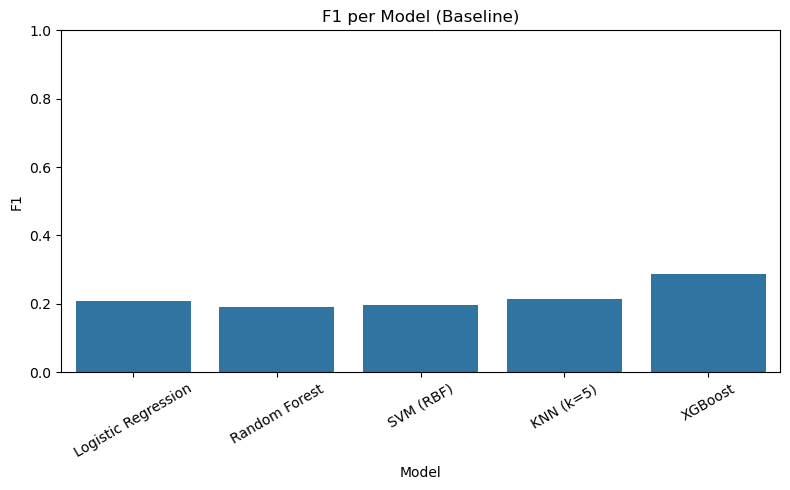

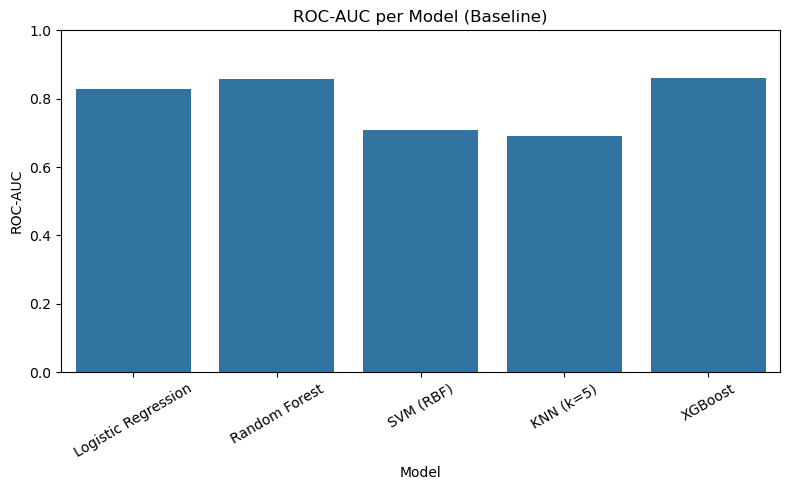

In [129]:
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]

plt.figure(figsize=(12, 6))
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=results_df,
        x="Model",
        y=metric
    )
    plt.title(f"{metric} per Model (Baseline)")
    plt.ylim(0, 1)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


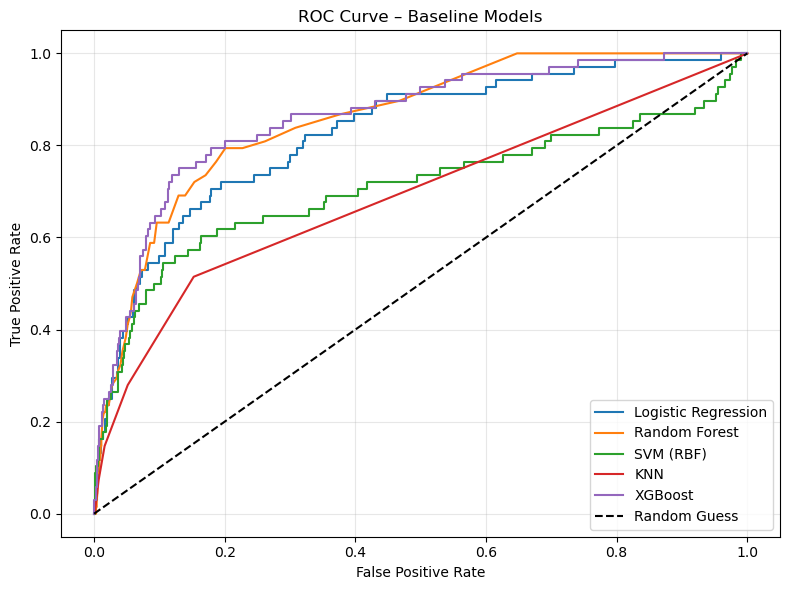

In [130]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test_scaled)
        # Normalisasi 0–1
        y_proba = (scores - scores.min()) / (scores.max() - scores.min())
    else:
        continue  # skip jika model tidak punya keduanya

    fpr, tpr, _ = roc_curve(y_test_encoded, y_proba)
    plt.plot(fpr, tpr, label=name)

# Garis diagonal random guess
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Baseline Models")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [134]:
results_baseline_df = pd.DataFrame(results_baseline)

# 4. Imbalance Handling

In [131]:
import sys
sys.path.append("../src")

from resampling import (
    apply_smote,
    apply_adasyn,
    apply_random_oversample,
    apply_random_undersample,
    resplit_and_scale
)
from evaluation import evaluate_model

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    )
}


In [133]:
balancing_methods = {
    "RandomOverSampler": apply_random_oversample,
    "RandomUnderSampler": apply_random_undersample,
    "SMOTE": apply_smote,
    "ADASYN": apply_adasyn
}


In [108]:
results_balanced = []

for bal_name, bal_func in balancing_methods.items():

    # Resampling
    X_res, y_res = bal_func(X_train_scaled, y_train_encoded)

    for model_name, model in models.items():
        result = evaluate_model(
            model,
            X_res,
            X_test_scaled,
            y_res,
            y_test_encoded,
            model_name=f"{model_name} + {bal_name}"
        )
        results_balanced.append(result)


Model: Logistic Regression + RandomOverSampler
Accuracy: 0.8403
ROC AUC : 0.8271

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       990
           1       0.23      0.62      0.33        68

    accuracy                           0.84      1058
   macro avg       0.60      0.74      0.62      1058
weighted avg       0.92      0.84      0.87      1058

Confusion Matrix:
[[847 143]
 [ 26  42]]
Model: Random Forest + RandomOverSampler
Accuracy: 0.9338
ROC AUC : 0.844

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       990
           1       0.46      0.19      0.27        68

    accuracy                           0.93      1058
   macro avg       0.71      0.59      0.62      1058
weighted avg       0.92      0.93      0.92      1058

Confusion Matrix:
[[975  15]
 [ 55  13]]
Model: SVM (RBF) + RandomOverSampler
Accuracy: 0.8507
ROC AUC

In [136]:
results_balanced_df.columns


Index(['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC'], dtype='object')

In [ ]:
results_balanced_df = pd.DataFrame(results_balanced)
results_balanced_df.sort_values(by="ROC-AUC", ascending=False)

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
4,XGBoost + RandomOverSampler,0.896975,0.321739,0.544118,0.404372,0.864156
6,Random Forest + RandomUnderSampler,0.812854,0.214912,0.720588,0.331081,0.848425
14,XGBoost + SMOTE,0.910208,0.324675,0.367647,0.344828,0.847920
1,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014
9,XGBoost + RandomUnderSampler,0.801512,0.211382,0.764706,0.331210,0.842781
19,XGBoost + ADASYN,0.901701,0.316327,0.455882,0.373494,0.841414
11,Random Forest + SMOTE,0.914934,0.333333,0.323529,0.328358,0.839089
16,Random Forest + ADASYN,0.913043,0.323529,0.323529,0.323529,0.837626
7,SVM (RBF) + RandomUnderSampler,0.840265,0.232804,0.647059,0.342412,0.829078
10,Logistic Regression + SMOTE,0.837429,0.231959,0.661765,0.343511,0.828209


In [135]:
results_all = pd.concat([results_baseline_df, results_balanced_df], ignore_index=True)
results_all


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709
4,XGBoost,0.938563,0.565217,0.191176,0.285714,0.861215
5,Logistic Regression + RandomOverSampler,0.840265,0.227027,0.617647,0.332016,0.827094
6,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014
7,SVM (RBF) + RandomOverSampler,0.850662,0.241379,0.617647,0.347107,0.821925
8,KNN (k=5) + RandomOverSampler,0.857278,0.187970,0.367647,0.248756,0.686133
9,XGBoost + RandomOverSampler,0.896975,0.321739,0.544118,0.404372,0.864156


In [81]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=results_all,
    x="Model",
    y="F1",
    hue="Sampling_Method"
)
plt.xticks(rotation=45, ha='right')
plt.title("Perbandingan F1-score Antar Model & Teknik Balancing")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Sampling_Method` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1400x600 with 0 Axes>